In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('lung_cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Статистическая информация


In [3]:
data.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


Название столбцов

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Категориальный столбец - LUNG_CANCER(имеет тип Object)



In [5]:
print(data.dtypes)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


Замена категориального столбца числовыми. Изначально в датасете M - злокачественная опухоль, B - доброкачественная

In [6]:
label_encoder = LabelEncoder()
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])
data['LUNG_CANCER']

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


Визуализация данных

<ipython-input-7-b5113b4ad71f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=data, palette='coolwarm')


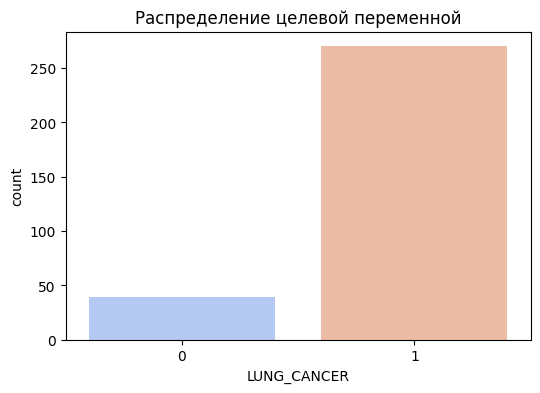

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=data, palette='coolwarm')
plt.title('Распределение целевой переменной')
plt.show()

Плотность распределения в зависимости от типа диагноза

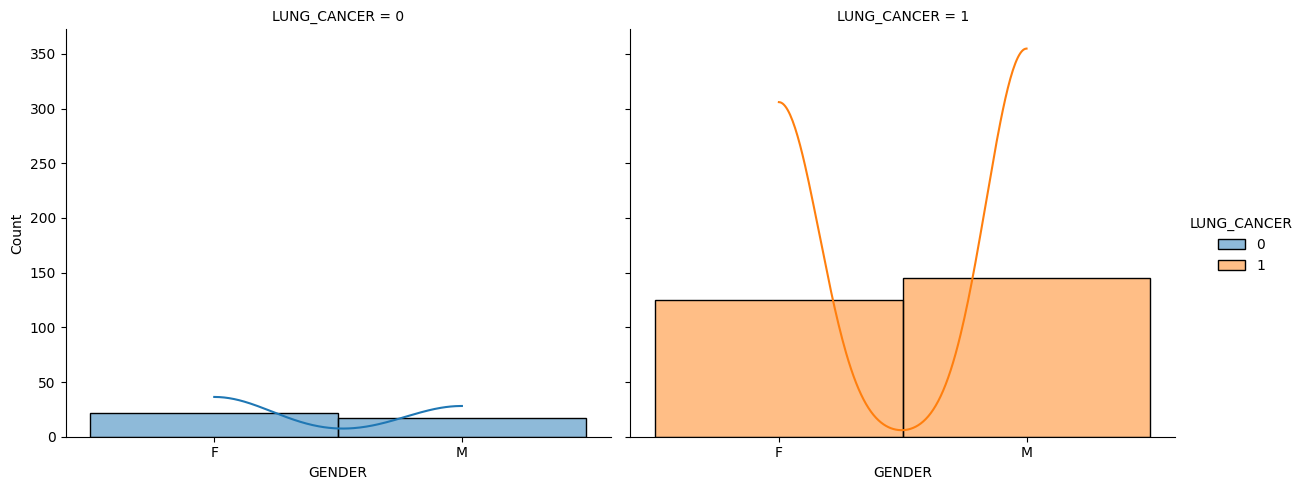

In [9]:
g = sns.FacetGrid(data, col='LUNG_CANCER', hue='LUNG_CANCER', height=5, aspect=1.2)
g.map(sns.histplot, 'GENDER', kde=True)
g.add_legend()
plt.show()

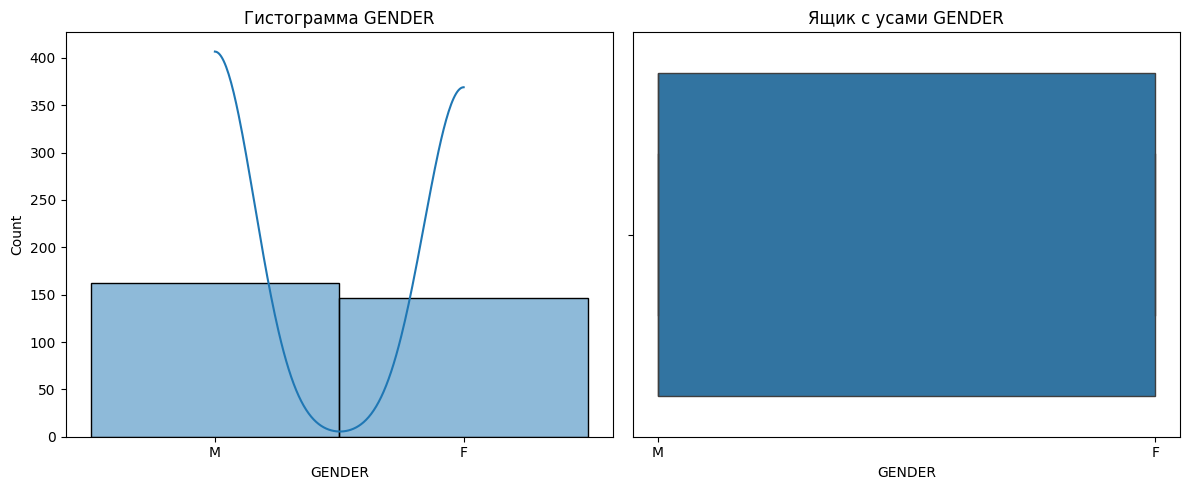

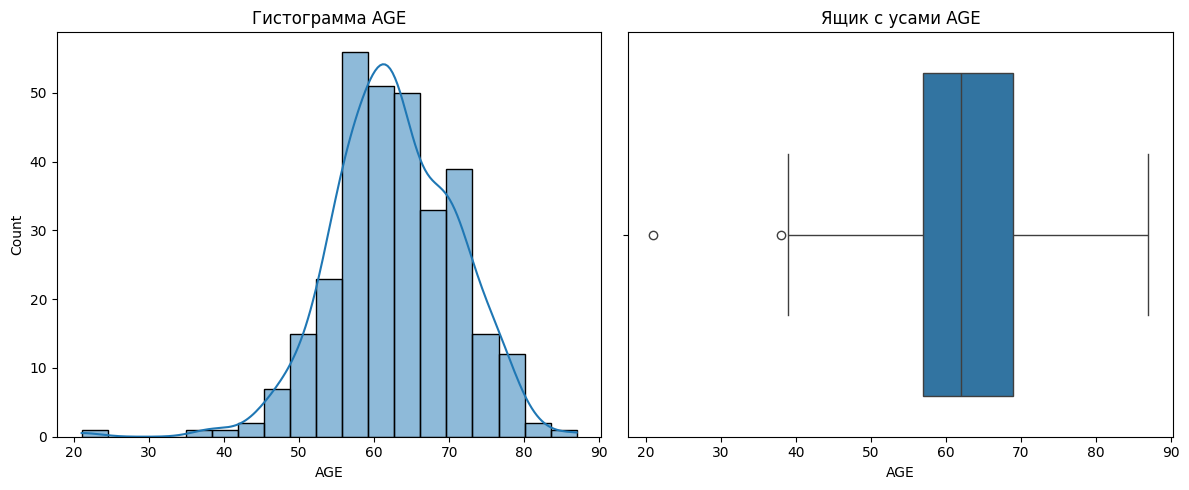

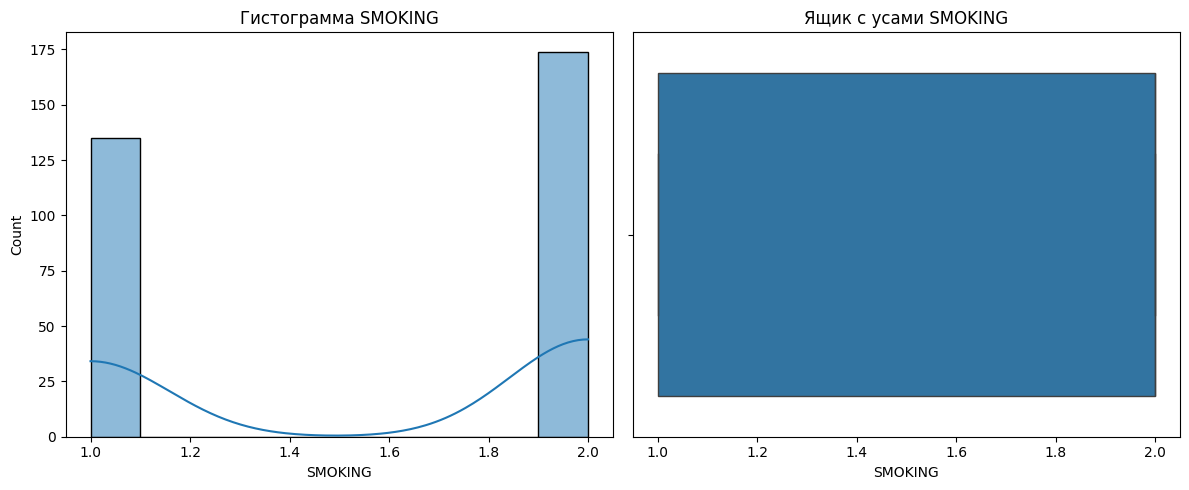

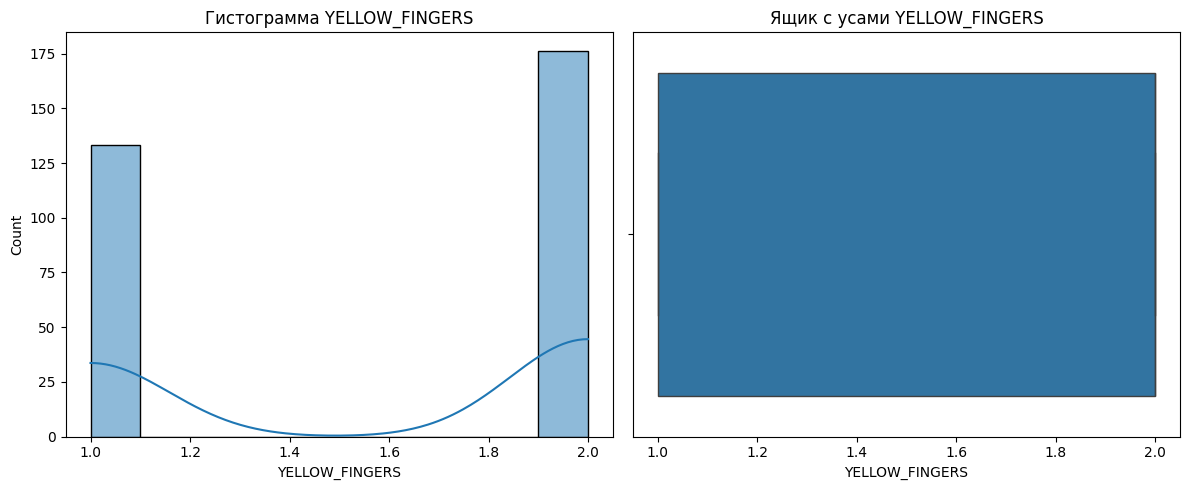

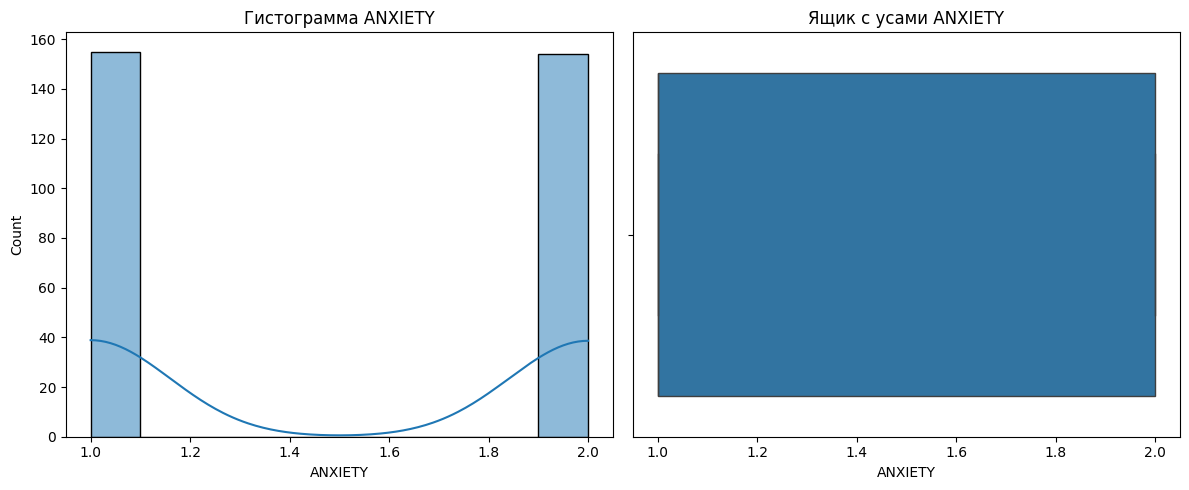

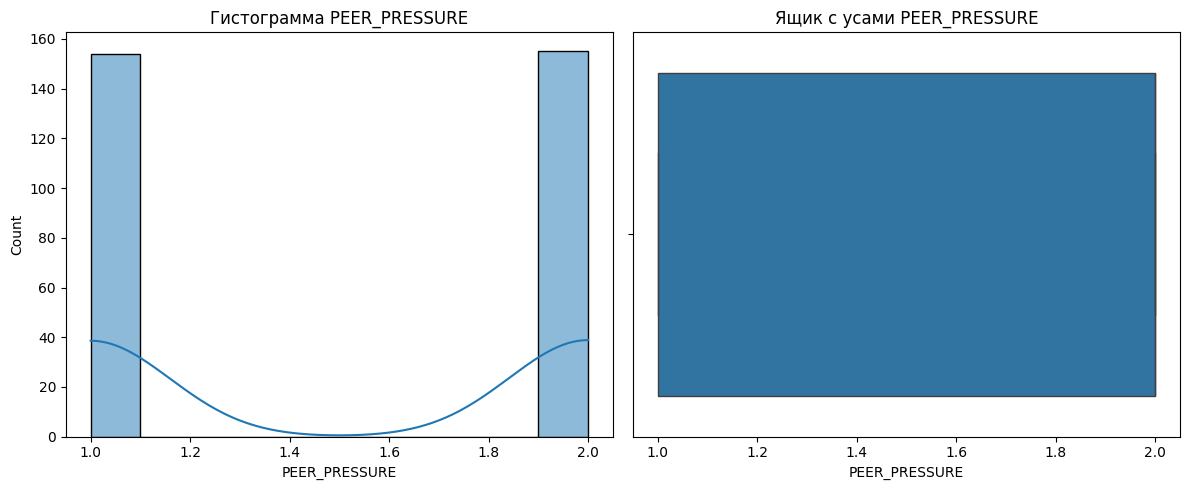

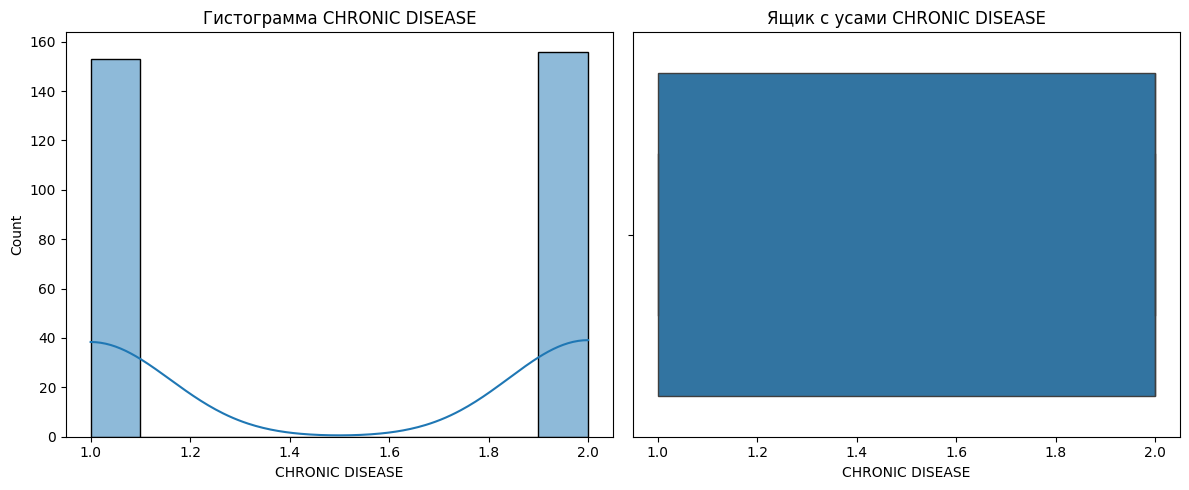

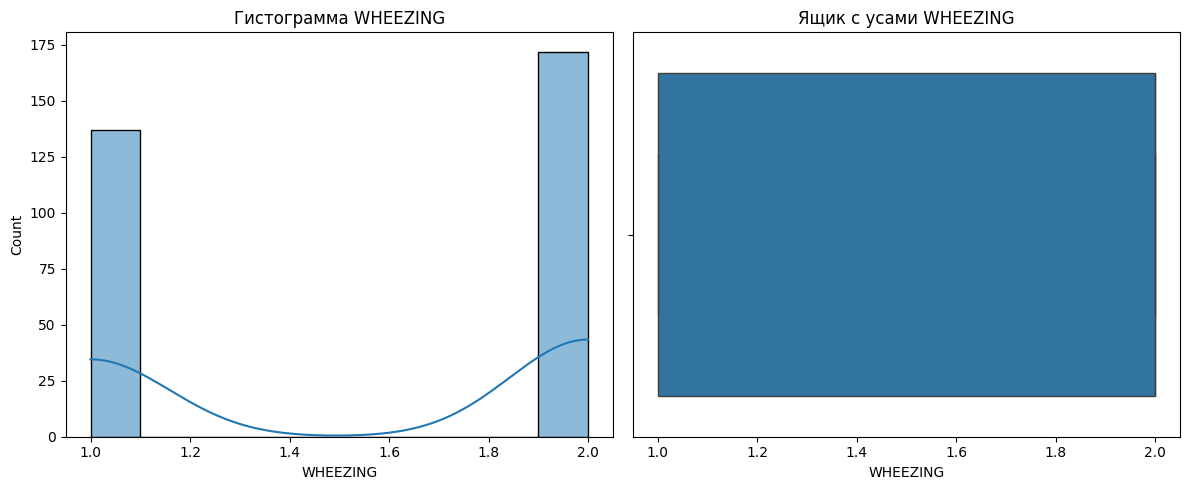

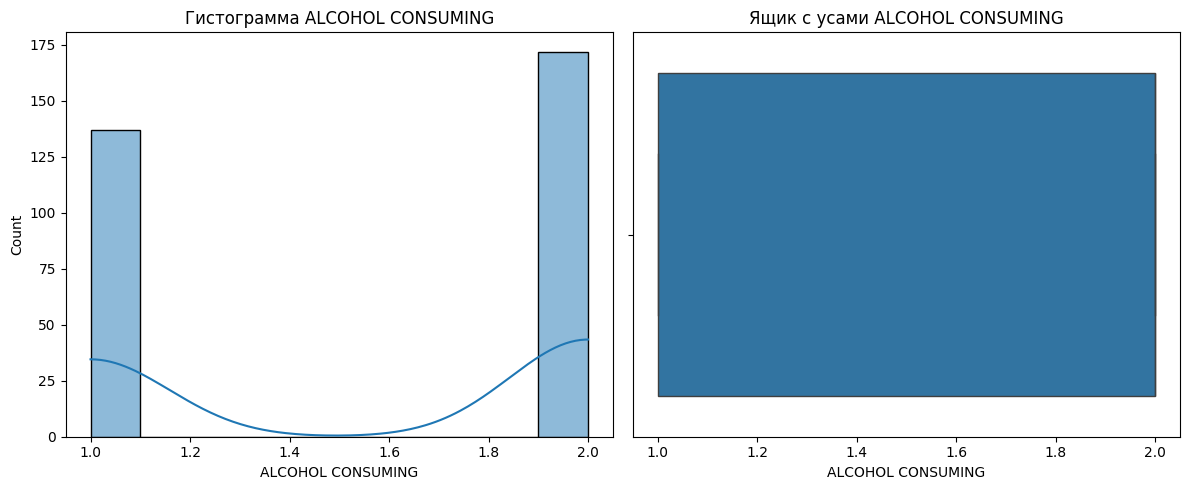

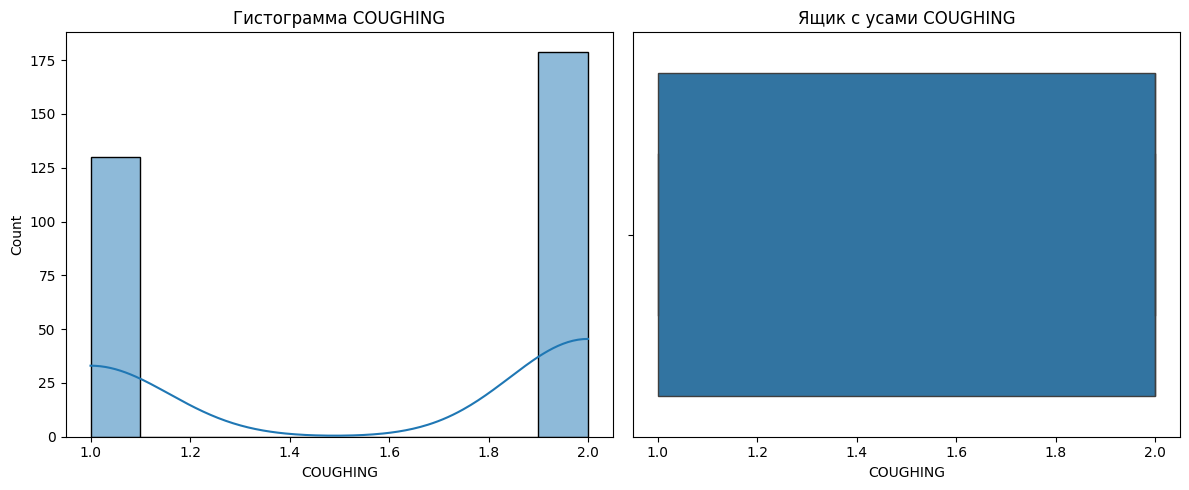

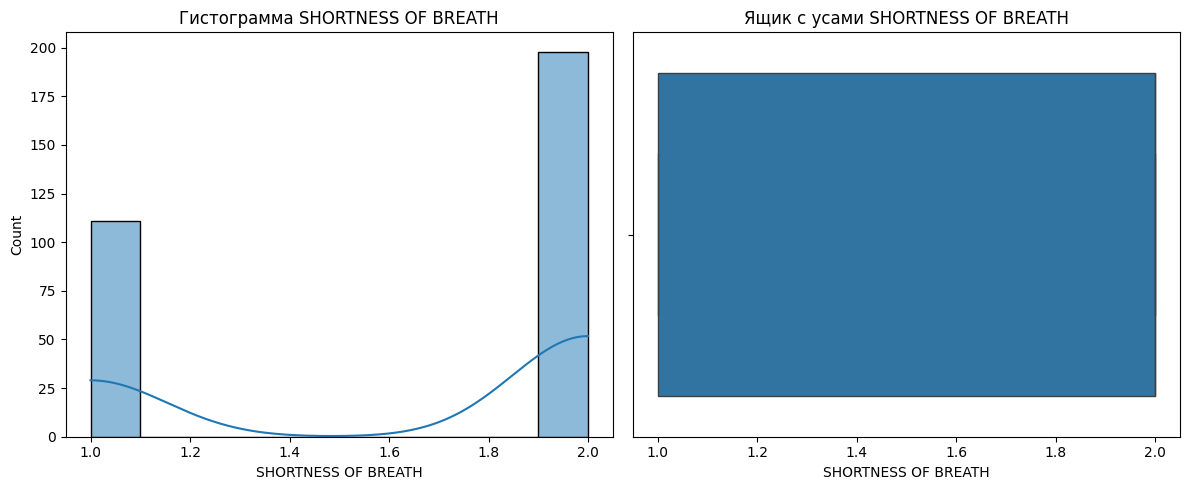

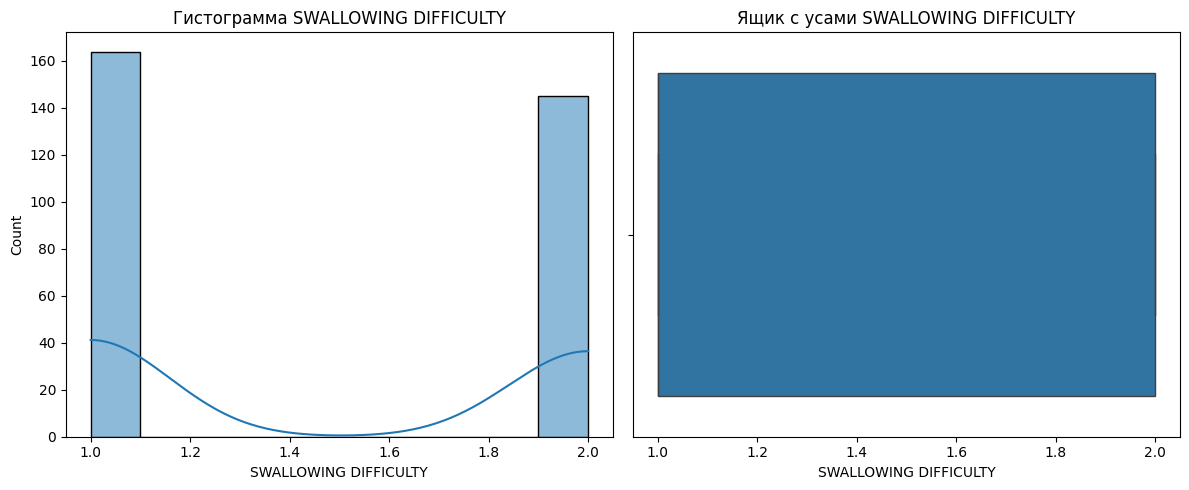

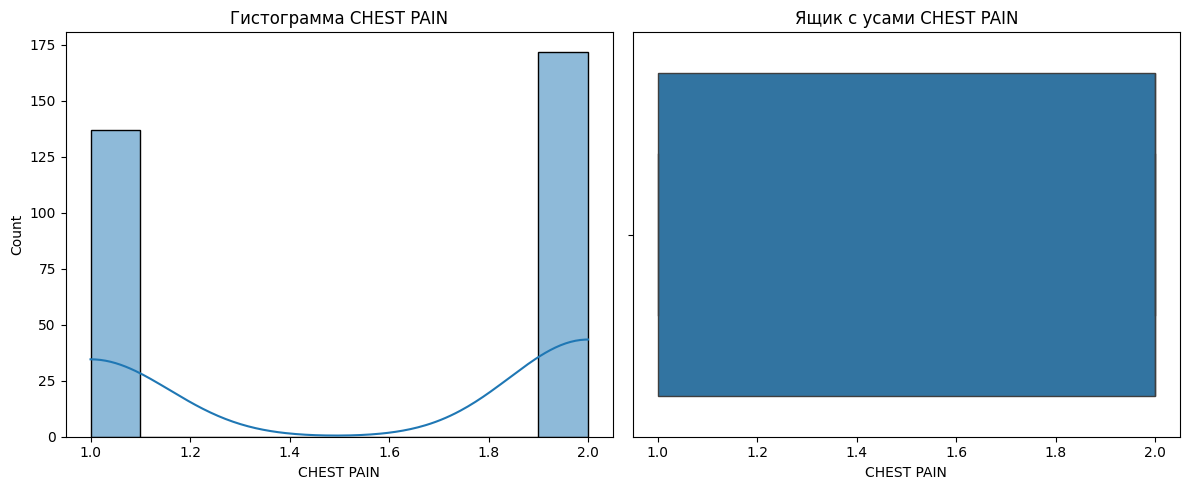

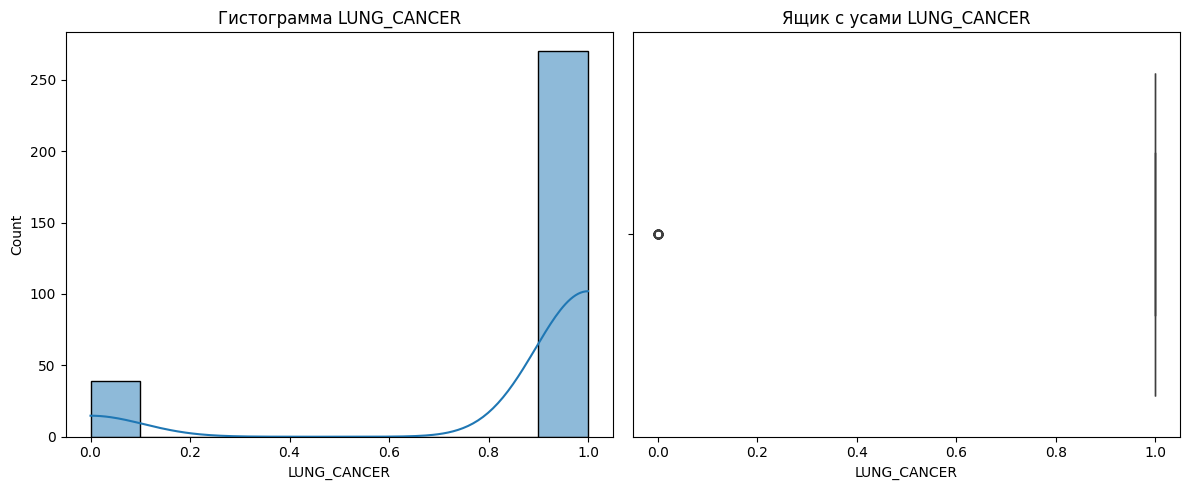

In [12]:
features = [
    'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'
]

def plot_visualizations(df, feature):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Гистограмма {feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Ящик с усами {feature}')

    plt.tight_layout()
    plt.show()

for feature in features:
    plot_visualizations(data, feature)

Групповая визуализация

Корелляционная матрица(взаимосвязь между всеми признаками с целевой переменной - LUNG_CANCER)

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


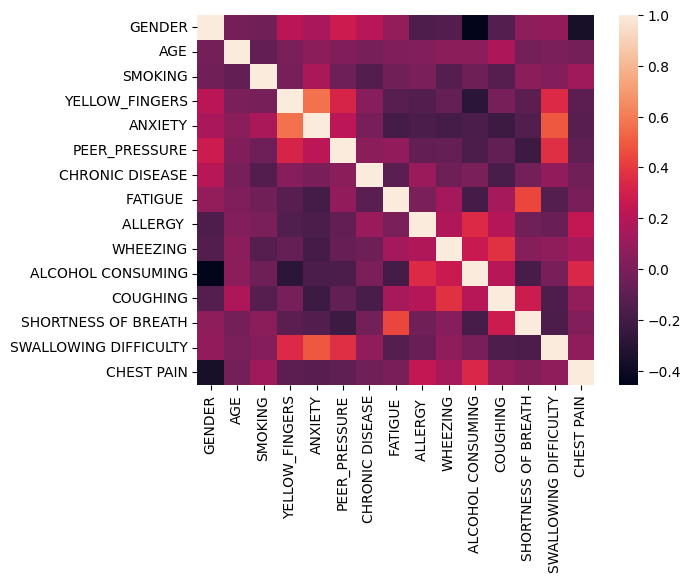

In [14]:
data['GENDER'] = data['GENDER'].map({'M': 0, 'F': 1})
corr_matrix = data.iloc[:,:-1].corr()
sns.heatmap(corr_matrix)
corr = abs(data.corr())['LUNG_CANCER'].sort_values(ascending=False)
print(corr)

Парные диаграммы

<Figure size 1200x1000 with 0 Axes>

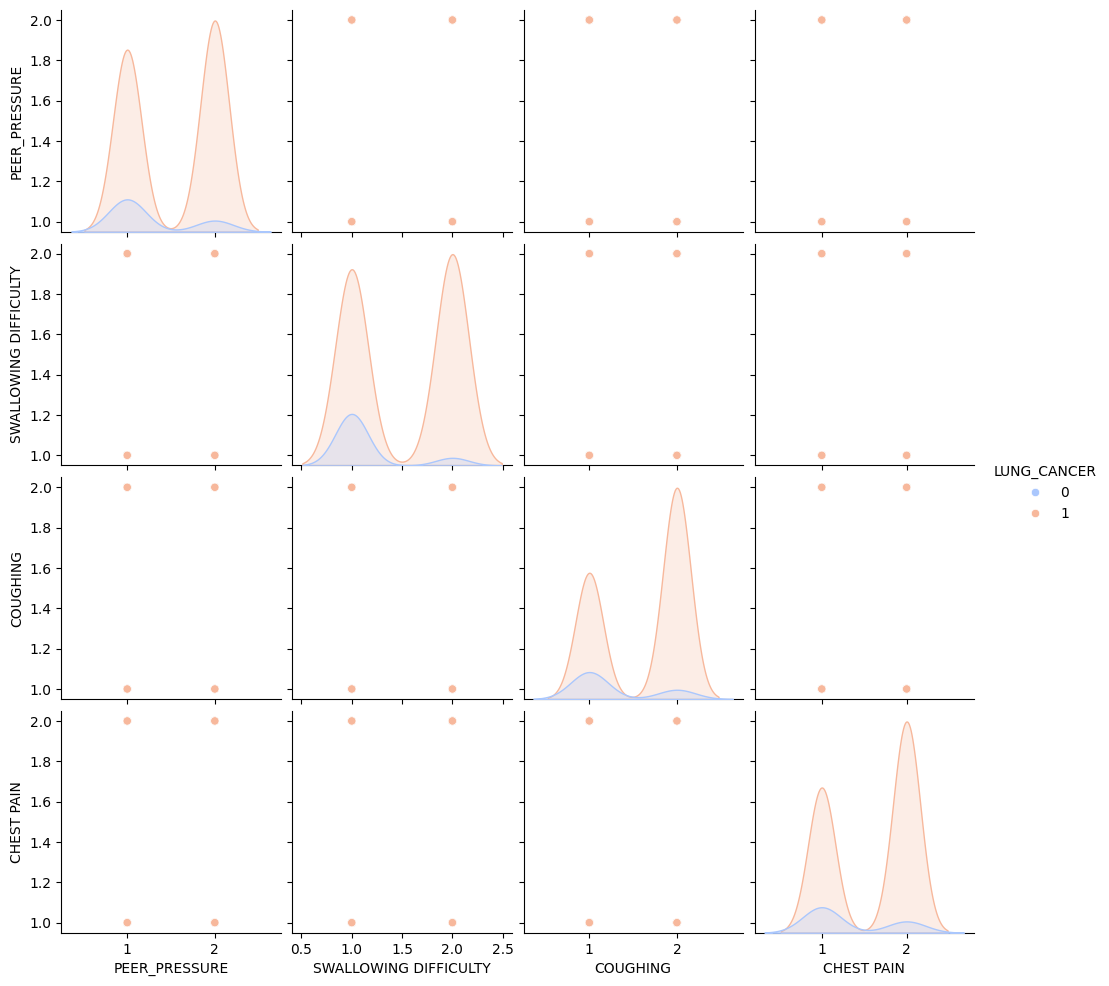

In [31]:
data.columns = data.columns.str.strip()

plt.figure(figsize=(12, 10))
sns.pairplot(data[['PEER_PRESSURE', 'SWALLOWING DIFFICULTY', 'COUGHING', 'CHEST PAIN', 'LUNG_CANCER']], hue='LUNG_CANCER', palette='coolwarm')
plt.show()


Сравнение показателей в зависимости от типа диагноза

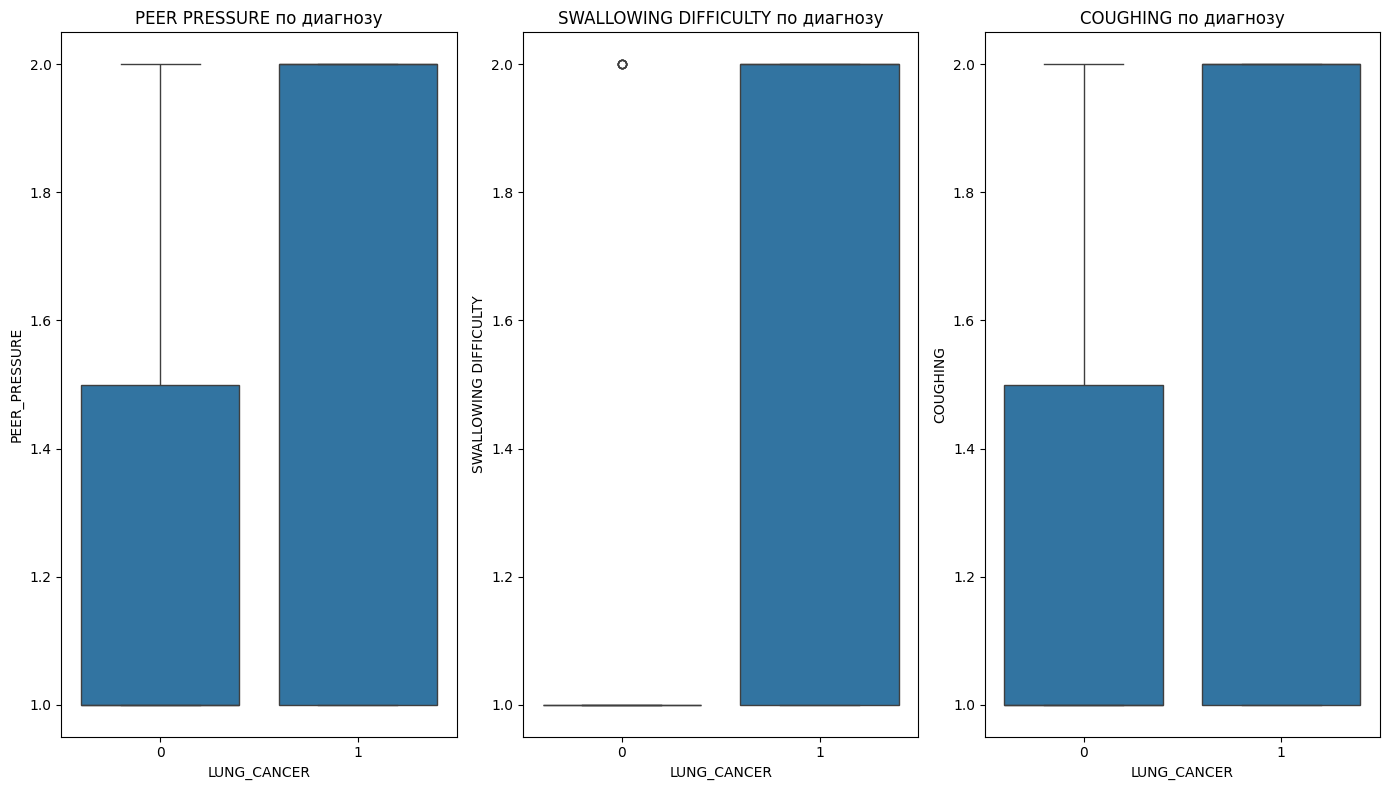

In [32]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x='LUNG_CANCER', y='PEER_PRESSURE', data=data)
plt.title('PEER PRESSURE по диагнозу')

plt.subplot(1, 3, 2)
sns.boxplot(x='LUNG_CANCER', y='SWALLOWING DIFFICULTY', data=data)
plt.title('SWALLOWING DIFFICULTY по диагнозу')

plt.subplot(1, 3, 3)
sns.boxplot(x='LUNG_CANCER', y='COUGHING', data=data)
plt.title('COUGHING по диагнозу')

plt.tight_layout()
plt.show()

Точечная диаграмма для визуализации взаимосвязи между парой наиболее коррелированных признаков

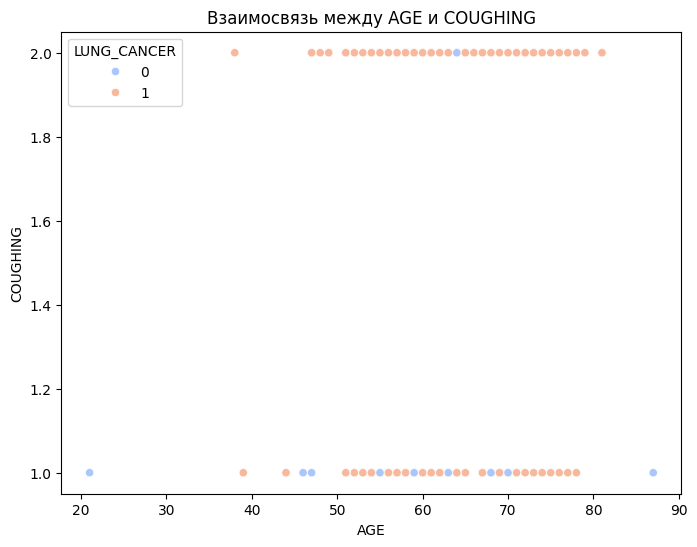

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='COUGHING', hue='LUNG_CANCER', data=data, palette='coolwarm')
plt.title('Взаимосвязь между AGE и COUGHING')
plt.show()

Гистограмма распределения radius_mean в зависимости от diagnosis

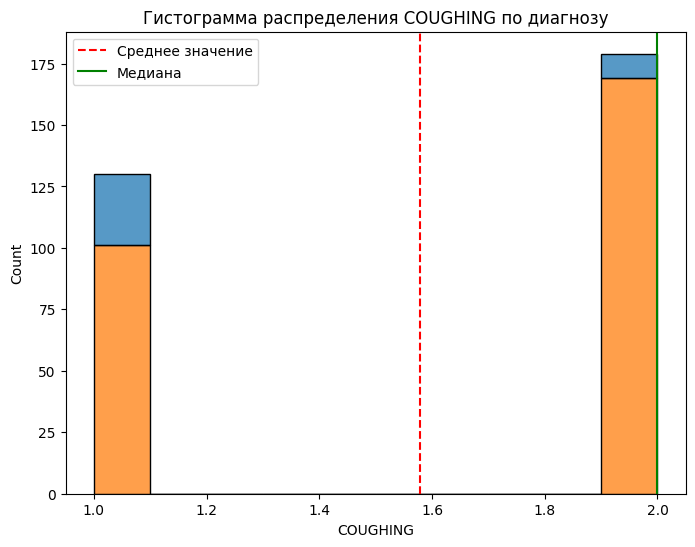

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='COUGHING', hue='LUNG_CANCER', multiple='stack')
plt.axvline(data['COUGHING'].mean(), color='r', linestyle='--', label='Среднее значение')
plt.axvline(data['COUGHING'].median(), color='g', linestyle='-', label='Медиана')
plt.title('Гистограмма распределения COUGHING по диагнозу')
plt.legend()
plt.show()
